<a href="https://colab.research.google.com/github/zhirongwang94/csm148/blob/main/final_project/second_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the final project. 
Background:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

# Helper Classes and Functions





In [189]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class DoesNothingScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X

# Part 1. Load the Data



In [190]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [191]:
!ls ./gdrive/MyDrive/datasets/stroke

dataset-stroke.csv


In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

csv_path = './gdrive/MyDrive/datasets/stroke/dataset-stroke.csv'
stroke = pd.read_csv(csv_path)

stroke.head(100)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0
1,98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1
2,3735,27176,Female,69.0,0,0,Yes,Private,Rural,103.73,34.7,never smoked,0
3,4500,13598,Male,60.0,0,0,Yes,Self-employed,Urban,227.23,40.0,formerly smoked,0
4,3254,27034,Female,65.0,0,0,Yes,Govt_job,Urban,82.72,29.8,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4894,53323,Female,34.0,0,0,No,Govt_job,Urban,79.60,46.3,never smoked,0
96,250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
97,3732,56923,Male,52.0,1,0,Yes,Private,Rural,116.21,32.8,smokes,0
98,3531,38742,Female,71.0,0,0,Yes,Private,Urban,80.34,29.2,never smoked,0


# Part2 Data Analysis and Imputation

In [193]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2310 non-null   int64  
 1   id                 2310 non-null   int64  
 2   gender             2310 non-null   object 
 3   age                2310 non-null   float64
 4   hypertension       2310 non-null   int64  
 5   heart_disease      2310 non-null   int64  
 6   ever_married       2310 non-null   object 
 7   work_type          2310 non-null   object 
 8   Residence_type     2310 non-null   object 
 9   avg_glucose_level  2310 non-null   float64
 10  bmi                2215 non-null   float64
 11  smoking_status     2310 non-null   object 
 12  stroke             2310 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 234.7+ KB


In [194]:
stroke.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2215.000000,2310.000000
mean,2530.838095,35961.380519,43.202043,0.096537,0.054545,105.747004,28.805418,0.052814
std,1483.865940,21191.909528,22.784886,0.295390,0.227140,44.984524,7.800871,0.223710
min,0.000000,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1217.250000,17007.750000,25.250000,0.000000,0.000000,77.007500,23.600000,0.000000
50%,2573.500000,36047.000000,44.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,3810.750000,54231.500000,61.000000,0.000000,0.000000,113.452500,32.900000,0.000000
max,5109.000000,72918.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [195]:
# .info() result shows there are some row in bmi has 95 Nah value
# let check if they have there 'Unknown' values in smoking_staus. 
stroke[stroke['smoking_status'] == 'Unknown']

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,3877,45983,Male,21.0,0,0,No,Private,Urban,56.79,20.4,Unknown,0
8,1680,70752,Male,37.0,0,0,Yes,Private,Urban,145.26,26.7,Unknown,0
10,4211,19498,Female,81.0,0,1,No,Self-employed,Urban,99.44,27.7,Unknown,0
14,445,61465,Male,13.0,0,0,No,children,Rural,55.39,23.2,Unknown,0
17,2677,45461,Female,70.0,0,0,Yes,Private,Urban,91.28,30.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,288,70970,Female,17.0,0,0,No,Self-employed,Urban,82.18,23.4,Unknown,0
2300,1610,71721,Female,18.0,0,0,No,Private,Rural,80.06,31.8,Unknown,0
2304,2114,25996,Female,29.0,0,0,Yes,Private,Urban,81.20,23.0,Unknown,0
2305,1812,12366,Female,35.0,0,0,No,Private,Urban,97.58,24.3,Unknown,0


In [196]:
# There are 95 Nah values in bmi column, and there are 705 'Unknown' values in Smoking_status. 
# In the first appraoch, I try to remove all the rows with Nah values and the Smoking_status column. 

# remove rows with Nah values. 
row_has_Nah = stroke.isnull().any(axis=1)
incomplete_rows = stroke[row_has_Nah]
stroke = stroke.drop(incomplete_rows.index, axis=0)
# stroke.info()

# remove smoking_status column. 
stroke = stroke.drop(['id','smoking_status', 'Unnamed: 0'], axis=1)



In [197]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
stroke.corr()


# Heatmap analysis: From the heatmap, we know that the correlation between aga and most featurees are significant.
# Thus, we want to drop the age column when we do the logistic regression.  

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.271278,0.267848,0.210488,0.335585,0.242456
hypertension,0.271278,1.000000,0.144237,0.147975,0.164191,0.183425
heart_disease,0.267848,0.144237,1.000000,0.158607,0.034359,0.160615
avg_glucose_level,0.210488,0.147975,0.158607,1.000000,0.158766,0.160134
bmi,0.335585,0.164191,0.034359,0.158766,1.000000,0.043944
stroke,0.242456,0.183425,0.160615,0.160134,0.043944,1.000000


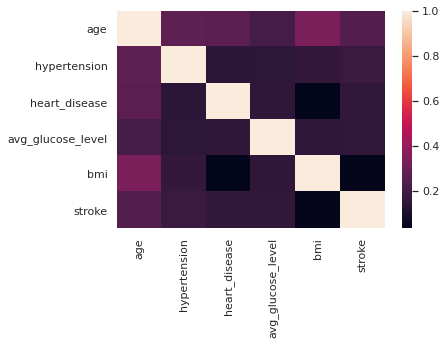

In [198]:
sns.heatmap(stroke.corr())

In [199]:
categorical_features = ['work_type', 'gender', 'ever_married', 'Residence_type']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2309
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2215 non-null   object 
 1   age                2215 non-null   float64
 2   hypertension       2215 non-null   int64  
 3   heart_disease      2215 non-null   int64  
 4   ever_married       2215 non-null   object 
 5   work_type          2215 non-null   object 
 6   Residence_type     2215 non-null   object 
 7   avg_glucose_level  2215 non-null   float64
 8   bmi                2215 non-null   float64
 9   stroke             2215 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 190.4+ KB


# Part3 Data preprocess, and PCA

In [200]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# from sklearn.base import BaseEstimator, TransformerMixin

categorical_features = ['work_type', 'gender', 'ever_married', 'Residence_type']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numerical_features ),                          
        # ("cat", OneHotEncoder(),  categorical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])


stroke_prepared = full_pipeline.fit_transform(stroke)
stroke_target = stroke['stroke']


In [201]:
from sklearn.model_selection import train_test_split
data_target = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(stroke_prepared, stroke_target, test_size=0.3, random_state=0)


Use PCA to simplilize data

In [211]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

pca.fit(X_train)
stroke_PCA = pca.fit_transform(stroke_prepared)
X_train_PCA  = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)
print("Variance Ratio: ", pca.explained_variance_ratio_)

Variance Ratio:  [0.28881673 0.16111303 0.1219418  0.10836956]


# Part4  Basic Logistic Regression

In [184]:
# Basic Logistic Regression without standalization 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

full_pipeline = ColumnTransformer([
        ("num", DoesNothingScaler(), numerical_features ),                          
        ("cat", OneHotEncoder(), categorical_features),
    ])

stroke_for_logistic = full_pipeline.fit_transform(stroke)
stroke_target = stroke['stroke']
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(stroke_for_logistic, stroke_target, test_size=0.3, random_state=0)

log_clf = LogisticRegression(random_state=0, max_iter=1000) 
log_clf.fit(X_train_logistic, y_train_logistic)
log_clf.score(X_test_logistic, y_test_logistic)

0.9428571428571428

In [185]:
# Basic Logistic Regression with standalization 
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), numerical_features ),                          
        ("cat", OneHotEncoder(), categorical_features),
    ])

stroke_for_logistic = full_pipeline.fit_transform(stroke)
stroke_target = stroke['stroke']

X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(stroke_for_logistic, stroke_target, test_size=0.3, random_state=0)

log_clf = LogisticRegression(random_state=0, max_iter=1000) 
log_clf.fit(X_train_logistic, y_train_logistic)
log_clf.score(X_test_logistic, y_test_logistic)

0.9428571428571428

In [186]:
# PCA + Logistic Regression 
import numpy as np
from sklearn.decomposition import PCA

X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(stroke_for_logistic, stroke_target, test_size=0.3, random_state=0)

pca = PCA(n_components=5)

X_train_logistic = pca.fit_transform(X_train_logistic)
X_test_logistic = pca.fit_transform(X_test_logistic)


log_clf = LogisticRegression(random_state=0,) 
log_clf.fit(X_train_logistic, y_train_logistic)
log_clf.score(X_test_logistic, y_test_logistic)
# pca.explained_variance_ratio_


0.9308270676691729

In [187]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(X_train)
print(pca.explained_variance_ratio_)

[0.28568383 0.14326885 0.12428125 0.11896593 0.09430252 0.07117956
 0.06554841 0.04208968 0.0253015  0.01929674]


# Part7 Neural Network

In [188]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

NN_clf = MLPClassifier(random_state=1, max_iter=1500).fit(X_train, y_train)
NN_clf.score(X_test, y_test)

0.9338345864661655

# Part5 Bagging

In [203]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Logistic Regression + Bagging
bagging_logReg_clf = BaggingClassifier(log_clf, n_estimators=10, random_state=0).fit(X_train, y_train)
print(bagging_logReg_clf.score(X_test, y_test))

# Logistic Regression + PCA + Bagging
bagging_logReg_clf = BaggingClassifier(log_clf, n_estimators=10, random_state=0).fit(X_train_PCA, y_train)
print(bagging_logReg_clf.score(X_test_PCA, y_test))


# Neural Network + Bagging 
bagging_NN_clf = BaggingClassifier(NN_clf, n_estimators=10, random_state=0).fit(X_train, y_train)
print(bagging_NN_clf.score(X_test, y_test))

# Neural Network + PCA + Bagging 
bagging_NN_clf = BaggingClassifier(NN_clf, n_estimators=10, random_state=0).fit(X_train_PCA, y_train)
print(bagging_NN_clf.score(X_test_PCA, y_test))

0.9428571428571428
0.9353383458646617
0.9323308270676691
0.9428571428571428


# Part8 Cross Validation

In [204]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Cross Validataion for Logistic Regression + Bagging 
kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = stroke_prepared;
y = stroke['stroke'].to_numpy()
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = bagging_logReg_clf
  clf.fit(X_train, y_train)
  print(clf.score(X_test, y_test))

0.9367945823927766
0.9413092550790068
0.9571106094808126
0.9683972911963883
0.9683972911963883


In [206]:
# Cross Validataion for Logistic Regression + PCA + Bagging 
kf = KFold(n_splits=5, random_state=None, shuffle=True)
X = X_train_PCA;
y = stroke['stroke'].to_numpy()
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = bagging_logReg_clf
  clf.fit(X_train, y_train)
  print(clf.score(X_test, y_test))

0.9548387096774194
0.9516129032258065
0.9580645161290322
0.9580645161290322
0.9516129032258065


In [209]:
# Cross Validataion for Neural Network  
kf = KFold(n_splits=5, random_state=None, shuffle=True)
X = stroke_prepared;
y = stroke['stroke'].to_numpy()
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = NN_clf
  clf.fit(X_train, y_train)
  print(clf.score(X_test, y_test))

0.9503386004514672
0.9571106094808126
0.9390519187358917
0.9480812641083521
0.927765237020316


In [213]:
# Cross Validataion for Neural Network  + PCA
kf = KFold(n_splits=5, random_state=None, shuffle=True)
X = stroke_PCA;
y = stroke['stroke'].to_numpy()
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = NN_clf
  clf.fit(X_train, y_train)
  print(clf.score(X_test, y_test))

0.945823927765237
0.9525959367945824
0.9706546275395034
0.9593679458239278
0.9480812641083521
